• Welke classifier zal het beste zijn en waarom?
• Welke hyperparameters zijn relevant en waarom?



### • Methoden
• Welke preprocessing stappen zijn nodig?
• Welke classifiers ga je vergelijken? (Minimaal 2 per dataset)
• Welke performance metric is passend?
### • Resultaten
• Let op: Niet alleen beste resultaat geven, het gaat juist ook om de vergelijking/verbetering!
• Minimaal 1 visualisatie/plotje per dataset.
### • Evaluatie/conclusie
• Welke classifier leverde beste resultaat op?
• Klopt dit met je voorspelling? Waarom wel/niet?
### • Bronvermeldingen & Literatuurverwijzingen



### • Dataset
### • Analyse probleem

# Alcohol Consumptie Studenten

### Over
De gegevens zijn verkregen in een enquête onder studenten wiskunde en Portugese taalcursussen op de middelbare school. Het bevat veel interessante sociale, gender- en studie-informatie over studenten. Je kunt het gebruiken voor het voorspellen van eindcijfers van studenten.

## Content:
Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:

school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
sex - student's sex (binary: 'F' - female or 'M' - male)
age - student's age (numeric: from 15 to 22)
address - student's home address type (binary: 'U' - urban or 'R' - rural)
famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
guardian - student's guardian (nominal: 'mother', 'father' or 'other')
traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
failures - number of past class failures (numeric: n if 1<=n<3, else 4)
schoolsup - extra educational support (binary: yes or no)
famsup - family educational support (binary: yes or no)
paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
activities - extra-curricular activities (binary: yes or no)
nursery - attended nursery school (binary: yes or no)
higher - wants to take higher education (binary: yes or no)
internet - Internet access at home (binary: yes or no)
romantic - with a romantic relationship (binary: yes or no)
famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
freetime - free time after school (numeric: from 1 - very low to 5 - very high)
goout - going out with friends (numeric: from 1 - very low to 5 - very high)
Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
health - current health status (numeric: from 1 - very bad to 5 - very good)
absences - number of school absences (numeric: from 0 to 93)
These grades are related with the course subject, Math or Portuguese:

G1 - first period grade (numeric: from 0 to 20)
G2 - second period grade (numeric: from 0 to 20)
G3 - final grade (numeric: from 0 to 20, output target)


## Beschrijf experimenten voor de 3 verschillende soorten (1 per week) datasets adhv checklist:
Ik vraag mij af of de alcohol consumptie een impact heeft op de cijfers die de student behalen.

### • Voorspelling:
Ik denk dat alcohol consumptie impact heeft op de cijfers die studenten behalen.




In [1]:
import numpy as np
import pandas as pd
import itertools
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
#data= pd.read_csv('../../../OneDrive/Bureaublad/datasets/studentAlcohol/student-mat.csv')
#data= pd.read_csv('../../../../senne/OneDrive/Bureaublad/datasets/studentAlcohol/student-mat.csv')
data = pd.read_csv('../datasets/studentAlcohol/student-mat.csv')
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [2]:
# test 1 (nul waarden)
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [3]:
df = data
df = df.drop(['age','traveltime','famrel','goout','absences','Mjob','Fjob','school'], axis=1)

# Replaces the string values 'F' and 'M' in the 'Sex' column with 0 and 1
df['sex'].replace({'F': 0, 'M': 1},inplace = True)
df.rename(columns={'sex': 'Male'}, inplace=True)

df['Pstatus'].replace({'T': 0, 'A': 1},inplace = True)
df.rename(columns={'Pstatus': 'ParentsApart'}, inplace=True)

df['schoolsup'].replace({'no': 0, 'yes': 1},inplace = True)
df['famsup'].replace({'no': 0, 'yes': 1},inplace = True)
df['paid'].replace({'no': 0, 'yes': 1},inplace = True)
df['activities'].replace({'no': 0, 'yes': 1},inplace = True)
df['nursery'].replace({'no': 0, 'yes': 1},inplace = True)
df['higher'].replace({'no': 0, 'yes': 1},inplace = True)
df['internet'].replace({'no': 0, 'yes': 1},inplace = True)
df['romantic'].replace({'no': 0, 'yes': 1},inplace = True)

df['address'].replace({'R': 0, 'U': 1},inplace = True)
df.rename(columns={'address': 'addressUrban'}, inplace=True)

df['famsize'].replace({'LE3': 0, 'GT3': 1},inplace = True)
df.rename(columns={'famsize': 'famsizeGR3'}, inplace=True)

# Onehot encode daily alcohol
onehot = pd.get_dummies(df['Dalc'], prefix='Dalc')
df = pd.concat([df, onehot], axis=1)
df = df.drop('Dalc', axis=1)

# Onehot encode Reason
onehot = pd.get_dummies(df['reason'], prefix='reason')
df = pd.concat([df, onehot], axis=1)
df = df.drop('reason', axis=1)

# Onehot encode guardian
onehot = pd.get_dummies(df['guardian'], prefix='guardian')
df = pd.concat([df, onehot], axis=1)
df = df.drop('guardian', axis=1)

# Onehot encode failures
#onehot = pd.get_dummies(df['failures'], prefix='failures')
#df = pd.concat([df, onehot], axis=1)
#df = df.drop('failures', axis=1)

df


,Male,addressUrban,famsizeGR3,ParentsApart,Medu,Fedu,studytime,failures,schoolsup,famsup,...,Dalc_3,Dalc_4,Dalc_5,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,0,1,1,1,4,4,2,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,0,1,1,0,1,1,2,0,0,1,...,0,0,0,1,0,0,0,1,0,0
2,0,1,0,0,1,1,2,3,1,0,...,0,0,0,0,0,1,0,0,1,0
3,0,1,1,0,4,2,3,0,0,1,...,0,0,0,0,1,0,0,0,1,0
4,0,1,1,0,3,3,2,0,0,1,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,0,1,2,2,2,2,0,1,...,0,1,0,1,0,0,0,0,0,1
391,1,1,0,0,3,1,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
392,1,0,1,0,1,1,1,3,0,0,...,1,0,0,1,0,0,0,0,0,1
393,1,0,0,0,3,2,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0


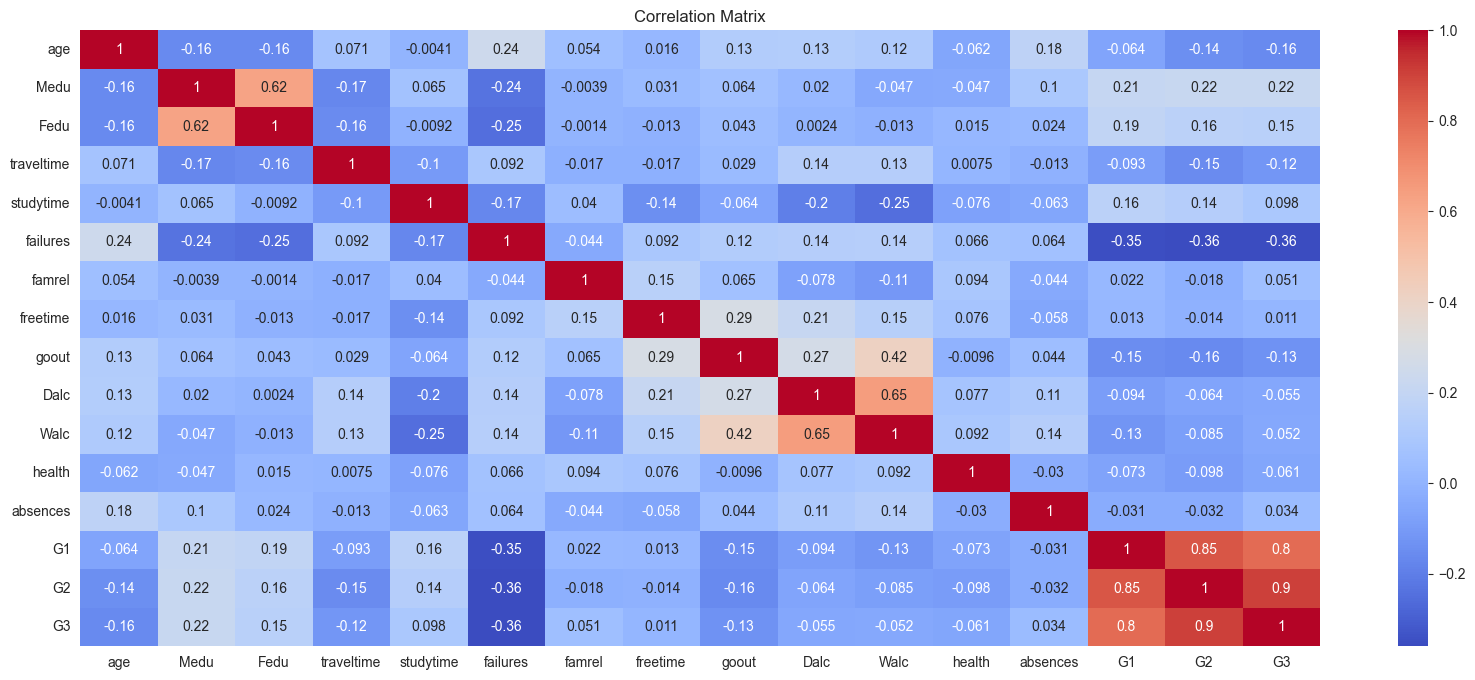

In [9]:
# Select only the numeric columns
numeric_df = data.select_dtypes(include=['number'])
# Bereken correlation matrix
corr_matrix = numeric_df.corr()
fig, ax = plt.subplots(figsize=(20, 8))

# Plot de correlation matrix als een heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax = ax )
plt.title('Correlation Matrix')
plt.show()


0    263
1    132
Name: romantic, dtype: int64


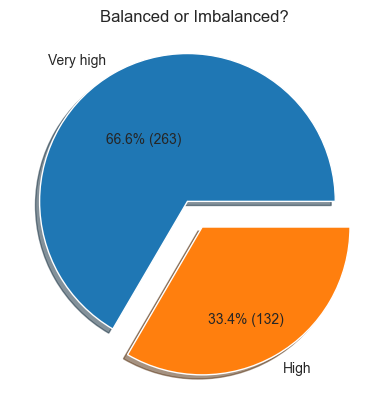

In [10]:
# Count the number of occurrences of each value in the 'price_range' column
value_counts = df['romantic'].value_counts()
print(value_counts)

# Define the label strings using f-strings
label = [f'{"Very high" if i==0 else "High"}' for i in range(len(value_counts))]

# Create a pie chart with percentage values formatted with a % sign and explode the slices
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(value_counts.values, autopct='%0.1f%%', explode=[0.1, 0.1], shadow=True, labels=label)

# Add count under percentage
for i, autotext in enumerate(autotexts):
    count = value_counts[i]
    autotext.set_text(f'{autotext.get_text()} ({count})')
    autotext.set_y(autotext.get_position()[1]-0.1)

# Set the title of the pie chart
ax.set_title('Balanced or Imbalanced?')

# Show the pie chart
plt.show()

In [15]:
y = df['romantic'].values.reshape(-1, 1).ravel()
X = df.drop('romantic', axis=1)


In [16]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.25, random_state=0)

model = LogisticRegression(max_iter=1000)

# Fit the logistic regression model to the training data
model.fit(X_train, y_train)

predictions = model.predict(X_test)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)

TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP + TN) / (TP + FP + TN + FN)

print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))

 # Calculates the R-squared score of the linear regression model on the test data
print("Test: ",model.score(X_test, y_test))
print("Train: ",model.score(X_train, y_train))

True Positive(TP)  =  10
False Positive(FP) =  8
True Negative(TN)  =  60
False Negative(FN) =  21
Accuracy of the binary classifier = 0.707
Test:  0.7070707070707071
Train:  0.6993243243243243


Dit is een goeie accuracy. Beter dan ik verwacht. Als je kijkt naar hoe de dataset is verdeeld.

In [ ]:
# Import required libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


# Create a Random Forest classifier with 100 trees
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Print the accuracy score of the classifier
print("Accuracy:", rf_classifier.score(X_test, y_test))
